In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook

In [49]:
links = pd.read_csv('links.csv')
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')
tags = pd.read_csv('tags.csv')

In [50]:
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [51]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [52]:
movies_action = movies[movies.genres.str.contains("Action")]
movies_action.head()

,movieId,title,genres
5,6,Heat (1995),Action|Crime|Thriller
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller
14,15,Cutthroat Island (1995),Action|Adventure|Romance
19,20,Money Train (1995),Action|Comedy|Crime|Drama|Thriller


In [53]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [54]:
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [55]:
# соединим таблицу с рейтингами и названиями фильмов
joined_ratings = pd.merge(ratings, movies_action, on='movieId', how = 'right')

In [56]:
joined_ratings.head()

,userId,movieId,rating,timestamp,title,genres
0,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller
1,6,6,4.0,845553757,Heat (1995),Action|Crime|Thriller
2,11,6,5.0,902154266,Heat (1995),Action|Crime|Thriller
3,18,6,4.0,1460138360,Heat (1995),Action|Crime|Thriller
4,23,6,4.0,1107342267,Heat (1995),Action|Crime|Thriller


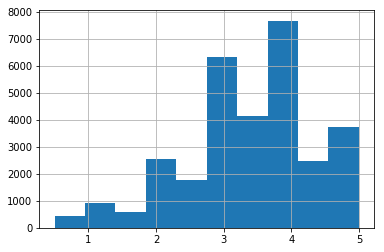

In [57]:
# посмотрим на гистограмму распределения оценок
joined_ratings.rating.hist()

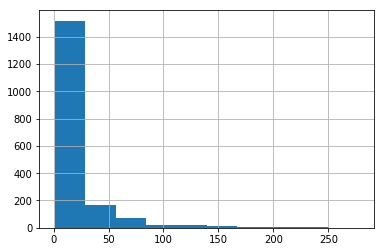

In [58]:
# гистограмма по количеству оценок на фильм
joined_ratings.groupby('title').rating.count().hist()

In [59]:
# достанем топ фильмов по оценкам
top_films = joined_ratings.groupby('title')[['rating']].mean().sort_values('rating', ascending=False)
top_films.head(10)

,rating
title,
Knock Off (1998),5.0
On the Other Side of the Tracks (De l'autre côté du périph) (2012),5.0
Sonatine (Sonachine) (1993),5.0
Last Hurrah for Chivalry (Hao xia) (1979),5.0
Shogun Assassin (1980),5.0
Battle Royale 2: Requiem (Batoru rowaiaru II: Chinkonka) (2003),5.0
Wonder Woman (2009),5.0
Priklyucheniya Kapitana Vrungelya (1979),5.0
Tokyo Tribe (2014),5.0


In [60]:
joined_ratings[joined_ratings['title']=='Knock Off (1998)']

,userId,movieId,rating,timestamp,title,genres
30428,594,2196,5.0,1108975245,Knock Off (1998),Action


In [61]:
# возьмем только фильмы с наивысшей средней оценкой в 5.0
films_with_highest_marks = top_films.iloc[np.where(top_films.rating == 5.0)].index

In [62]:
# достанем по каждому фильму количество рейтингов
title_num_ratings = {}

for title, group in tqdm_notebook(joined_ratings.groupby('title')):
    title_num_ratings[title] = group.userId.unique().shape[0]

In [63]:
# выведем топ фильмов со средней оценкой в 5.0 по количеству отзывов и увидим, что рейтинг получается не самый удачный
sorted([(title_num_ratings[f], f) for f in films_with_highest_marks], key=lambda x: x[0], reverse=True)[:10]

[(1, 'Knock Off (1998)'),
 (1, "On the Other Side of the Tracks (De l'autre côté du périph) (2012)"),
 (1, 'Sonatine (Sonachine) (1993)'),
 (1, 'Last Hurrah for Chivalry (Hao xia) (1979)'),
 (1, 'Shogun Assassin (1980)'),
 (1, 'Battle Royale 2: Requiem (Batoru rowaiaru II: Chinkonka) (2003)'),
 (1, 'Wonder Woman (2009)'),
 (1, 'Priklyucheniya Kapitana Vrungelya (1979)'),
 (1, 'Tokyo Tribe (2014)'),
 (1, 'Love Exposure (Ai No Mukidashi) (2008)')]

### Приняли решение сортировать фильмы по следующей метрике: средняя оценка фильма, умноженная на нормированное количество рейтингов

In [64]:
# достанем простые статистики по количеству рейтингов
min_num_ratings = np.min([title_num_ratings[f] for f in title_num_ratings.keys()])
max_num_ratings = np.max([title_num_ratings[f] for f in title_num_ratings.keys()])
mean_num_ratings = np.mean([title_num_ratings[f] for f in title_num_ratings.keys()])
median_num_ratings = np.median([title_num_ratings[f] for f in title_num_ratings.keys()])

In [65]:
print(min_num_ratings)
print(max_num_ratings)
print(mean_num_ratings)
print(median_num_ratings)

1
278
16.766830870279147
5.0


In [66]:
# считаем средний рейтинг на каждый фильм
title_mean_rating = {}

for title, group in tqdm_notebook(joined_ratings.groupby('title')):
    title_mean_rating[title] = group.rating.mean()

In [67]:
film_with_our_mark = []

# посчитаем нашу метрику для каждого фильма из датасета
for f in title_num_ratings.keys():
    film_with_our_mark.append(
        (f, title_mean_rating[f] * (title_num_ratings[f] - mean_num_ratings) / (max_num_ratings - min_num_ratings))
    )

In [68]:
# выводим топ 20 и получилось уже очень неплохо
list(sorted(film_with_our_mark, key=lambda x: x[1], reverse=True))[:20]

[('Matrix, The (1999)', 3.9538121525684975),
 ('Star Wars: Episode IV - A New Hope (1977)', 3.5778276873123183),
 ('Braveheart (1995)', 3.205422673665224),
 ('Fight Club (1999)', 3.1041747597843043),
 ('Jurassic Park (1993)', 2.9950338781099397),
 ('Terminator 2: Judgment Day (1991)', 2.9708274874433775),
 ('Star Wars: Episode V - The Empire Strikes Back (1980)', 2.9560183403919225),
 ('Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)',
  2.78322584517437),
 ('Star Wars: Episode VI - Return of the Jedi (1983)', 2.6773392058535994),
 ('Saving Private Ryan (1998)', 2.5631049876453145),
 ('Lord of the Rings: The Return of the King, The (2003)', 2.5015840545779544),
 ('Independence Day (a.k.a. ID4) (1996)', 2.304076307579185),
 ('Gladiator (2000)', 2.178585829950056),
 ('Batman (1989)', 2.1318184936118105),
 ('True Lies (1994)', 2.035607183370203),
 ('Dark Knight, The (2008)', 2.023241496993645),
 ('Speed (1994)', 1.9650752120629666),
 ('Princess Bride, The (1

### Появилась гипотеза использовать теги в ранжировании фильмов, решили считать не только количество отзывов, а ещё и количество проставленных тегов на фильм

In [69]:
# соединим уже созданную таблицу с таблицей с проставленными тегами по фильмам
joined_with_tags = joined_ratings.join(tags.set_index('movieId'), on='movieId', lsuffix='_left', rsuffix='_right')

In [70]:
# достанем по каждому фильму количество рейтингов
title_num_actions = {}

for title, group in tqdm_notebook(joined_with_tags.groupby('title')):
    title_num_actions[title] = group.shape[0]

In [71]:
min_num_actions = np.min([title_num_actions[f] for f in title_num_actions.keys()])
max_num_actions = np.max([title_num_actions[f] for f in title_num_actions.keys()])
mean_num_actions = np.mean([title_num_actions[f] for f in title_num_actions.keys()])
median_num_actions = np.median([title_num_actions[f] for f in title_num_actions.keys()])

In [72]:
print(min_num_actions)
print(max_num_actions)
print(mean_num_actions)
print(median_num_actions)

1
11772
47.60591133004926
5.0


In [73]:
film_with_new_mark = []

for f in title_num_actions.keys():
    # посчитаем нашу новую метрику для каждого фильма из датасета
    film_with_new_mark.append(
        (f, title_mean_rating[f] * (title_num_actions[f] - mean_num_ratings) / (max_num_ratings - min_num_ratings))
    )

In [74]:
# выведем топ фильмов по новой метрике
list(sorted(film_with_new_mark, key=lambda x: x[1], reverse=True))[:20]

[('Fight Club (1999)', 181.33341663704064),
 ('Star Wars: Episode IV - A New Hope (1977)', 99.42620313857584),
 ('Léon: The Professional (a.k.a. The Professional) (Léon) (1994)',
  67.2928429982855),
 ('Inception (2010)', 54.33508590666564),
 ('Braveheart (1995)', 34.25054902745584),
 ('Star Wars: Episode V - The Empire Strikes Back (1980)', 31.856740362052577),
 ('Lord of the Rings: The Return of the King, The (2003)', 27.259706798260265),
 ('Terminator 2: Judgment Day (1991)', 25.44916683762388),
 ('Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)',
  24.048568805463177),
 ('Blade Runner (1982)', 23.616398815141),
 ('Avatar (2009)', 22.493095858083198),
 ('Matrix, The (1999)', 20.78413706231579),
 ('Gladiator (2000)', 19.097358393126953),
 ('Aliens (1986)', 15.989283364285589),
 ('Terminator, The (1984)', 14.50779984128538),
 ('Django Unchained (2012)', 11.891253742630896),
 ('X-Men (2000)', 10.4331239437535),
 ('Dark Knight, The (2008)', 8.8625916774990

ДЗ Постороить топ фильмов в катигориях, например, Action  и Comedy/

In [75]:
movies_comedy = movies[movies.genres.str.contains("Comedy")]
movies_comedy.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
6,7,Sabrina (1995),Comedy|Romance


In [76]:
# соединим таблицу с рейтингами и названиями фильмов в категории Comedy
joined_ratings_comedy = pd.merge(ratings, movies_comedy, on='movieId', how = 'right')
joined_ratings_comedy.head()

,userId,movieId,rating,timestamp,title,genres
0,1.0,1,4.0,9.649827e+08,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5.0,1,4.0,8.474350e+08,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7.0,1,4.5,1.106636e+09,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15.0,1,2.5,1.510578e+09,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17.0,1,4.5,1.305696e+09,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [77]:
# достанем по каждому фильму количество рейтингов
title_num_ratings_comedy = {}

for title, group in tqdm_notebook(joined_ratings_comedy.groupby('title')):
    title_num_ratings_comedy[title] = group.userId.unique().shape[0]

In [78]:
# достанем простые статистики по количеству рейтингов
min_num_comedy = np.min([title_num_ratings_comedy[f] for f in title_num_ratings_comedy.keys()])
max_num_comedy = np.max([title_num_ratings_comedy[f] for f in title_num_ratings_comedy.keys()])
mean_num_comedy = np.mean([title_num_ratings_comedy[f] for f in title_num_ratings_comedy.keys()])
median_num_comedy = np.median([title_num_ratings_comedy[f] for f in title_num_ratings_comedy.keys()])

In [79]:
print(min_num_comedy)
print(max_num_comedy)
print(mean_num_comedy)
print(median_num_comedy)

1
329
10.400798934753661
3.0


In [80]:
# считаем средний рейтинг на каждый фильм Comedy
title_mean_rating_comedy = {}

for title, group in tqdm_notebook(joined_ratings_comedy.groupby('title')):
    title_mean_rating_comedy[title] = group.rating.mean()

In [94]:
min_num_ratings_comedy

1

In [81]:
film_with_new_mark_comedy = []

for f in title_num_ratings_comedy.keys():
    # посчитаем нашу новую метрику для каждого фильма из датасета
    film_with_new_mark_comedy.append(
        (f, title_mean_rating_comedy[f] * (title_num_ratings_comedy[f] - mean_num_ratings_comedy) / (max_num_ratings_comedy - min_num_ratings_comedy))
    )

In [82]:
# выведем топ фильмов по новой метрике
list(sorted(film_with_new_mark_comedy, key=lambda x: x[1], reverse=True))[:20]

[('Aladdin (1992)', 1.9955991859802908),
 ('Back to the Future (1985)', 1.9771385739472367),
 ("Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)", 1.397835338789473),
 ('Ace Ventura: Pet Detective (1994)', 1.3959685828177184),
 ('Breakfast Club, The (1985)', 1.1820056889396768),
 ('Big Lebowski, The (1998)', 1.1438468604217233),
 ('Batman Forever (1995)', 1.1255203139034606),
 ('Clerks (1994)', 1.1002954862559737),
 ('Austin Powers: The Spy Who Shagged Me (1999)', 1.0784592524755676),
 ('Being John Malkovich (1999)', 1.0681999019784412),
 ('Austin Powers: International Man of Mystery (1997)', 0.9656499261147737),
 ('As Good as It Gets (1997)', 0.9650570496113583),
 ('American Pie (1999)', 0.9538397457585166),
 ('Big (1988)', 0.9140588836969273),
 ('Airplane! (1980)', 0.9005828412317824),
 ("Bug's Life, A (1998)", 0.8747793459904292),
 ('Blues Brothers, The (1980)', 0.8548106976219086),
 ('Beetlejuice (1988)', 0.8533016462281506),
 ('Back to the Future Part II (1989)', 0.81871167384